# 🎁 Wrapper for `wgrib2`

Herbie provides a very basic wrapper for wgrib2. Note that the **wgrbi2** functionality requires **wgrib2** is in your path (it can be installed via conda on Linux), and it can only perform actions on _local_ grib2 files.

In [1]:
from herbie import Herbie
from herbie.wgrib2 import wgrib2
from pathlib import Path

In [2]:
H = Herbie('2023-02-01')
ss = ":2 m"  # ss is for searchString
H.download(ss)
myFile = H.get_localFilePath(ss)
myFile, myFile.exists()

✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2023-Feb-01 00:00 UTC F00 ┊ GRIB2 @ aws ┊ IDX @ aws


(PosixPath('/home/blaylock/data/hrrr/20230201/subset_d7ef7d97__hrrr.t00z.wrfsfcf00.grib2'),
 True)

In [3]:
# Print the standard inventory of a grib2 file

print(wgrib2.inventory(myFile))

1:0:d=2023020100:LTNGSD:2 m above ground:anl:
2:28030:d=2023020100:TMP:2 m above ground:anl:
3:1249692:d=2023020100:POT:2 m above ground:anl:
4:2405293:d=2023020100:SPFH:2 m above ground:anl:
5:3723585:d=2023020100:DPT:2 m above ground:anl:
6:4980778:d=2023020100:RH:2 m above ground:anl:



In [4]:
# Create a standard inventory file

wgrib2.create_inventory_file(myFile)

idxFile = Path(str(myFile)+'.idx')
idxFile, idxFile.exists()

(PosixPath('/home/blaylock/data/hrrr/20230201/subset_d7ef7d97__hrrr.t00z.wrfsfcf00.grib2.idx'),
 True)

In [5]:
# Create a regional subset of the file

wgrib2.region(myFile, -100, -90, 30, 40, name="hi")

Create region subset file /home/blaylock/data/hrrr/20230201/hi_subset_d7ef7d97__hrrr.t00z.wrfsfcf00.grib2


In [7]:
import xarray as xr

In [8]:
ds = xr.open_dataset("/home/blaylock/data/hrrr/20230201/hi_subset_d7ef7d97__hrrr.t00z.wrfsfcf00.grib2", engine='cfgrib')
ds

<xarray.Dataset>
Dimensions:            (y: 381, x: 324)
Coordinates:
    time               datetime64[ns] ...
    step               timedelta64[ns] ...
    heightAboveGround  float64 ...
    latitude           (y, x) float64 ...
    longitude          (y, x) float64 ...
    valid_time         datetime64[ns] ...
Dimensions without coordinates: y, x
Data variables:
    unknown            (y, x) float32 ...
    t2m                (y, x) float32 ...
    pt                 (y, x) float32 ...
    sh2                (y, x) float32 ...
    d2m                (y, x) float32 ...
    r2                 (y, x) float32 ...
Attributes:
    GRIB_edition:            2
    GRIB_centre:             kwbc
    GRIB_centreDescription:  US National Weather Service - NCEP
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             US National Weather Service - NCEP
    history:                 2023-03-08T21:29 GRIB to CDM+CF via cfgrib-0.9.1...

In [11]:
from toolbox import EasyMap, pc, ccrs

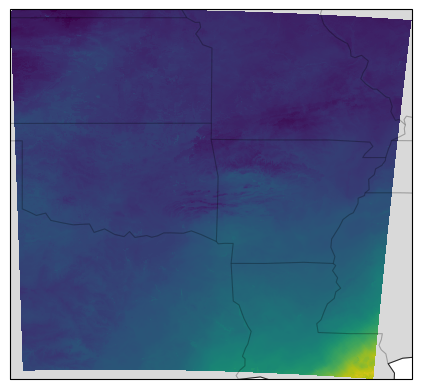

In [13]:
ax = EasyMap().STATES(color='k').ax
ax.pcolormesh(ds.longitude, ds.latitude, ds.t2m)